In [ ]:
import torch
torch.cuda.is_available() # is GPU available
# Outputs True if running with GPU

False

In [ ]:
!pip install gdown
FILE_ID='1rnsJ14IkcT_WBOvn3zslvEN2Zp5ULsVN'
!gdown --id FILE_ID
!ls



/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=FILE_ID

but Gdown can't. Please check connections and permissions.
sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Baseline Methods: Logistic, LDA, and QDA

## Logistic

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/potential_customers.csv')
data2 = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/ad_views_without_engagement.csv')
data['potential_labels'] = 1
data2['potential_labels'] = 0
merged_data = pd.concat([data, data2], ignore_index=True)
print(merged_data.head())

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)
train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)

print(f"Train Set Size: {len(train_data)}")
print(f"Validation Set Size: {len(valid_data)}")
print(f"Test Set Size: {len(test_data)}")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define features & target
features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
            'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
            'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
            'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

# Split the data into training, validation, and test sets
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(penalty="l1", solver='liblinear', max_iter=10000)
model.fit(X_train_scaled, y_train)

# Validate the model
valid_score = model.score(X_valid_scaled, y_valid)
print(f"Validation Accuracy: {valid_score}")

# Plot feature importance
plt.figure(figsize=(10, 8))
feature_importance = model.coef_[0]
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
features_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Predict on the test set and evaluate the predictions
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

### Confusion Matrix

In [ ]:
# Confusion Matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### ROC Curve

In [ ]:
y_score = model.decision_function(X_test_scaled)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
print(f"AUC: {auc}")

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## LDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define features and target
features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
            'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
            'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
            'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

# Split the data into training, validation, and test sets
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and apply MinMaxScaler
# Scaling might not be necessary for LDA if the features are all of similar scales or units
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create and train the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

# Validate the model
valid_score = lda.score(X_valid_scaled, y_valid)
print(f"Validation Accuracy: {valid_score}")

# Predict on the test set and evaluate the predictions
y_pred = lda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

## QDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define features and target
features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
            'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
            'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
            'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

# Split the data into training, validation, and test sets
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Create and train the QDA model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

# Validate the model
valid_score = qda.score(X_valid_scaled, y_valid)
print(f"Validation Accuracy: {valid_score}")

y_pred = qda.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

# **CatBoost with different sampling**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/potential_customers.csv')
data2 = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/ad_views_without_engagement.csv')
data['potential_labels'] = 1
data2['potential_labels'] = 0
merged_data = pd.concat([data, data2], ignore_index=True)
print(merged_data.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/嘿統計學習嘿/potential_customers.csv'

In [ ]:
print(merged_data.columns)

Index(['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'u_newsCatInterests',
       'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news',
       'i_docId', 'i_s_sourceId', 'i_regionEntity', 'i_cat', 'i_entities',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro',
       'potential_labels'],
      dtype='object')


In [ ]:
label_counts = merged_data['potential_labels'].value_counts(normalize=True)
print("merged:")
print(label_counts)

merged:
potential_labels
1    0.760501
0    0.239499
Name: proportion, dtype: float64


In [ ]:
print(merged_data.dtypes)

u_userId                 int64
u_phonePrice             int64
u_browserLifeCycle       int64
u_browserMode            int64
u_feedLifeCycle          int64
u_refreshTimes           int64
u_newsCatInterests      object
u_newsCatDislike        object
u_newsCatInterestsST    object
u_click_ca2_news        object
i_docId                 object
i_s_sourceId            object
i_regionEntity           int64
i_cat                    int64
i_entities              object
i_dislikeTimes           int64
i_upTimes                int64
i_dtype                  int64
e_ch                     int64
e_m                      int64
e_po                     int64
e_pl                     int64
e_rn                     int64
e_section                int64
e_et                     int64
label                    int64
cillabel                 int64
pro                      int64
potential_labels         int64
dtype: object


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)


print(f"train: {len(train_data)}")
print(f"valid: {len(valid_data)}")
print(f"test: {len(test_data)}")

train: 2259412
valid: 648774
test: 319546


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = train_data.drop(columns=['potential_labels'])
y = train_data['potential_labels']

# oversampling
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
oversampling_train = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns),
                                 pd.DataFrame(y_oversampled, columns=['potential_labels'])], axis=1)

# undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
undersampling_train = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns),
                                  pd.DataFrame(y_undersampled, columns=['potential_labels'])], axis=1)

print("Oversampled training set shape:", oversampling_train.shape)
print("Undersampled training set shape:", undersampling_train.shape)

Oversampled training set shape: (3436674, 29)
Undersampled training set shape: (1082150, 29)


In [ ]:
o_train_label_counts = oversampling_train['potential_labels'].value_counts(normalize=True)
print("test:")
print(o_train_label_counts)
print(oversampling_train.head(100))

test:
potential_labels
1    0.5
0    0.5
Name: proportion, dtype: float64
    u_userId  u_phonePrice  u_browserLifeCycle  u_browserMode  \
0     161877            15                  17             13   
1     270129            14                  17             13   
2     234277            14                  17             13   
3     130776            13                  17             14   
4     179085            14                  17             10   
..       ...           ...                 ...            ...   
95    105988            11                  17             15   
96    187481            10                  17             14   
97    186743            10                  17             14   
98    245322            14                  17             13   
99    250686            14                  17             14   

    u_feedLifeCycle  u_refreshTimes u_newsCatInterests u_newsCatDislike  \
0                17               4    213^96^96^57^57                

In [ ]:
train_label_counts = train_data['potential_labels'].value_counts(normalize=True)
print("test:")
print(train_label_counts)

valid_label_counts = valid_data['potential_labels'].value_counts(normalize=True)
print("\n valid:")
print(valid_label_counts)

test_label_counts = test_data['potential_labels'].value_counts(normalize=True)
print("\n test:")
print(test_label_counts)

test:
potential_labels
1    0.760524
0    0.239476
Name: proportion, dtype: float64

 valid:
potential_labels
1    0.760462
0    0.239538
Name: proportion, dtype: float64

 test:
potential_labels
1    0.760419
0    0.239581
Name: proportion, dtype: float64


0:	learn: 0.8219236	test: 0.8213338	best: 0.8213338 (0)	total: 563ms	remaining: 3h 7m 29s
100:	learn: 0.8251085	test: 0.8244396	best: 0.8244520 (95)	total: 1m 23s	remaining: 4h 34m 3s
200:	learn: 0.8271559	test: 0.8265683	best: 0.8265683 (200)	total: 2m 48s	remaining: 4h 37m 18s
300:	learn: 0.8290777	test: 0.8283301	best: 0.8283301 (300)	total: 3m 58s	remaining: 4h 20m 5s
400:	learn: 0.8308994	test: 0.8301396	best: 0.8301396 (400)	total: 5m 10s	remaining: 4h 13m 9s
500:	learn: 0.8327799	test: 0.8317781	best: 0.8317781 (500)	total: 6m 19s	remaining: 4h 6m 4s
600:	learn: 0.8343303	test: 0.8332316	best: 0.8332316 (600)	total: 7m 25s	remaining: 3h 59m 38s
700:	learn: 0.8357489	test: 0.8346080	best: 0.8346080 (699)	total: 8m 34s	remaining: 3h 55m 54s
800:	learn: 0.8370253	test: 0.8358103	best: 0.8358288 (798)	total: 9m 42s	remaining: 3h 52m 32s
900:	learn: 0.8387771	test: 0.8374488	best: 0.8374488 (900)	total: 10m 51s	remaining: 3h 50m 13s
1000:	learn: 0.8401938	test: 0.8387713	best: 0.8387

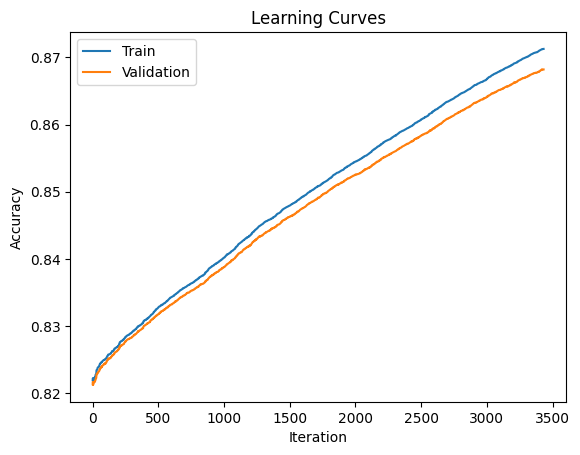

Feature Importance:
               Feature  Importance
0             u_userId   27.034527
12                 e_m   21.013495
14                e_pl   19.556252
5       u_refreshTimes   17.018632
1         u_phonePrice    5.583496
4      u_feedLifeCycle    2.966163
3        u_browserMode    2.844884
11                e_ch    1.090999
15                e_rn    0.880024
2   u_browserLifeCycle    0.753030
16           e_section    0.288436
7                i_cat    0.284161
9            i_upTimes    0.134663
13                e_po    0.130741
17                e_et    0.115097
10             i_dtype    0.105107
8       i_dislikeTimes    0.075149
18               label    0.058272
6       i_regionEntity    0.050827
20                 pro    0.014235
19            cillabel    0.001810
Accuracy: 0.8684821590631708
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        45380        31177
Actual 1        10849       232140


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


train_pool = Pool(data=X_train, label=y_train)
valid_pool = Pool(data=X_valid, label=y_valid)
test_pool = Pool(data=X_test, label=y_test)


model = CatBoostClassifier(iterations=20000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=10,
                           early_stopping_rounds=10
                           )


model.fit(train_pool, eval_set=valid_pool)


metrics = model.get_evals_result()
train_accuracy = metrics['learn']['Accuracy']
valid_accuracy = metrics['validation']['Accuracy']


plt.plot(train_accuracy, label='Train')
plt.plot(valid_accuracy, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)


y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

In [ ]:
# oversampling的資料
features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

X_train = oversampling_train[features]
y_train = oversampling_train[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


train_pool = Pool(data=X_train, label=y_train)
valid_pool = Pool(data=X_valid, label=y_valid)
test_pool = Pool(data=X_test, label=y_test)


model = CatBoostClassifier(iterations=20000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=10,
                           early_stopping_rounds=20
                           )


model.fit(train_pool, eval_set=valid_pool)


metrics = model.get_evals_result()
train_accuracy = metrics['learn']['Accuracy']
valid_accuracy = metrics['validation']['Accuracy']


plt.plot(train_accuracy, label='Train')
plt.plot(valid_accuracy, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)


y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

0:	learn: 0.7238001	test: 0.7699492	best: 0.7699492 (0)	total: 1.16s	remaining: 6h 25m 43s
10:	learn: 0.7252969	test: 0.7696039	best: 0.7699492 (0)	total: 14.9s	remaining: 7h 32m
20:	learn: 0.7289775	test: 0.7715013	best: 0.7715013 (20)	total: 23.7s	remaining: 6h 15m 6s
30:	learn: 0.7296686	test: 0.7715075	best: 0.7715106 (28)	total: 34.5s	remaining: 6h 10m 17s
40:	learn: 0.7307100	test: 0.7724940	best: 0.7724940 (40)	total: 45.1s	remaining: 6h 5m 32s
50:	learn: 0.7321271	test: 0.7737656	best: 0.7738288 (49)	total: 53.5s	remaining: 5h 48m 49s
60:	learn: 0.7331117	test: 0.7743729	best: 0.7744577 (59)	total: 1m 4s	remaining: 5h 48m 47s
70:	learn: 0.7341011	test: 0.7747459	best: 0.7747459 (70)	total: 1m 14s	remaining: 5h 48m 44s
80:	learn: 0.7350386	test: 0.7748769	best: 0.7750372 (78)	total: 1m 23s	remaining: 5h 40m 16s
90:	learn: 0.7360719	test: 0.7757077	best: 0.7757879 (88)	total: 1m 33s	remaining: 5h 42m 1s
100:	learn: 0.7372305	test: 0.7763905	best: 0.7763905 (100)	total: 1m 44s	rem

0:	learn: 0.7200370	test: 0.7724986	best: 0.7724986 (0)	total: 287ms	remaining: 1h 35m 46s
10:	learn: 0.7260140	test: 0.7707137	best: 0.7759189 (3)	total: 3.12s	remaining: 1h 34m 27s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.775918887
bestIteration = 3

Shrink model to first 4 iterations.


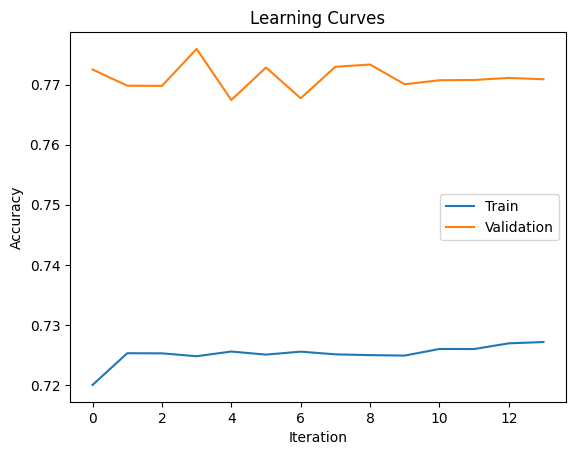

Feature Importance:
               Feature  Importance
5       u_refreshTimes   44.059169
4      u_feedLifeCycle   37.628465
2   u_browserLifeCycle    7.611275
1         u_phonePrice    7.154832
16           e_section    2.615355
9            i_upTimes    0.930904
0             u_userId    0.000000
13                e_po    0.000000
19            cillabel    0.000000
18               label    0.000000
17                e_et    0.000000
15                e_rn    0.000000
14                e_pl    0.000000
10             i_dtype    0.000000
12                 e_m    0.000000
11                e_ch    0.000000
8       i_dislikeTimes    0.000000
7                i_cat    0.000000
6       i_regionEntity    0.000000
3        u_browserMode    0.000000
20                 pro    0.000000
Accuracy: 0.7766894281261539
Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0        47821        28736
Actual 1        42622       200367


In [ ]:
# undersampling

features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'

X_train = undersampling_train[features]
y_train = undersampling_train[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


train_pool = Pool(data=X_train, label=y_train)
valid_pool = Pool(data=X_valid, label=y_valid)
test_pool = Pool(data=X_test, label=y_test)


model = CatBoostClassifier(iterations=20000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=10,
                           early_stopping_rounds=10
                           )


model.fit(train_pool, eval_set=valid_pool)


metrics = model.get_evals_result()
train_accuracy = metrics['learn']['Accuracy']
valid_accuracy = metrics['validation']['Accuracy']


plt.plot(train_accuracy, label='Train')
plt.plot(valid_accuracy, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)


y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)

#**CatBoost with bag-of-values encoder (non-sampling)**

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/potential_customers.csv')
data2 = pd.read_csv('/content/drive/MyDrive/ad_views_without_engagement.csv')
data['potential_labels'] = 1
data2['potential_labels'] = 0
merged_data = pd.concat([data, data2], ignore_index=True)
print(merged_data.head())

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)

print(f"train: {len(train_data)}")
print(f"valid: {len(valid_data)}")
print(f"test: {len(test_data)}")


"""bov encoding (recorded by sparse matrix)  """
from scipy.sparse import csr_matrix

def bov_encode_column_sparse(column, separator='^'):

    # 1. 分割字串成數字列表，過濾掉非數字元素
    def safe_split_and_convert(x):
        try:
            return [int(val) for val in x.split(separator) if val.isdigit()]
        except:
            return []

    split_col = column.apply(safe_split_and_convert)

    # 2. 找出所有 unique value 並建立index
    unique_values = sorted(set(val for sublist in split_col for val in sublist))
    value_to_index = {val: idx for idx, val in enumerate(unique_values)}

    # 3. 用sparse matrix來記錄
    row_indices = []
    col_indices = []
    data_values = []
    for row_idx, sequence in enumerate(split_col):
        for val in sequence:
            if val in value_to_index:
                row_indices.append(row_idx)
                col_indices.append(value_to_index[val])
                data_values.append(1)  # 使用count，增加出現次數

    encoded_sparse_matrix = csr_matrix(
        (data_values, (row_indices, col_indices)),
        shape=(len(column), len(unique_values))
    )

    column_names = [f'{column.name}_feature_{i}' for i in range(len(unique_values))]
    return encoded_sparse_matrix, column_names


encoded_dataframes = {}
for col in ['u_newsCatInterests', 'u_newsCatDislike', 'u_newsCatInterestsST',
            'u_click_ca2_news', 'i_docId', 'i_s_sourceId', 'i_entities']:
    encoded_sparse_matrix, column_names = bov_encode_column_sparse(merged_data[col])
    encoded_dataframes[col] = (encoded_sparse_matrix, column_names)

for col, (encoded_sparse_matrix, column_names) in encoded_dataframes.items():
    merged_data.drop(columns=[col], inplace=True)
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_sparse_matrix, columns=column_names)
    merged_data = pd.concat([merged_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print(merged_data)

import pandas as pd
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)


print(f"train: {len(train_data)}")
print(f"valid: {len(valid_data)}")
print(f"test: {len(test_data)}")

train_label_counts = train_data['potential_labels'].value_counts(normalize=True)
print("train:")
print(train_label_counts)

valid_label_counts = valid_data['potential_labels'].value_counts(normalize=True)
print("\n valid:")
print(valid_label_counts)

test_label_counts = test_data['potential_labels'].value_counts(normalize=True)
print("\n test:")
print(test_label_counts)


target = 'potential_labels'

X_train = train_data.drop(columns=['u_userId','potential_labels'])
y_train = train_data[target]
X_valid = valid_data.drop(columns=['u_userId','potential_labels'])
y_valid = valid_data[target]
X_test = test_data.drop(columns=['u_userId','potential_labels'])
y_test = test_data[target]


train_pool = Pool(data=X_train, label=y_train)
valid_pool = Pool(data=X_valid, label=y_valid)
test_pool = Pool(data=X_test, label=y_test)


model = CatBoostClassifier(iterations=10000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=10,
                           early_stopping_rounds=10
                           )


model.fit(train_pool, eval_set=valid_pool)
model.save_model('catboost_model2.json')


metrics = model.get_evals_result()
train_accuracy = metrics['learn']['Accuracy']
valid_accuracy = metrics['validation']['Accuracy']

y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix:")
print(cm_df)


plt.plot(train_accuracy, label='Train')
plt.plot(valid_accuracy, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


feature_importance = model.get_feature_importance(train_pool)
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_20_features = importance_df.head(20)
print("Top 20 Feature Importances:")
print(top_20_features)

# **XGBoost with bag-of-values encoder (non-sampling)**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/potential_customers.csv')
data2 = pd.read_csv('/content/drive/MyDrive/嘿統計學習嘿/ad_views_without_engagement.csv')
data['potential_labels'] = 1
data2['potential_labels'] = 0
merged_data = pd.concat([data, data2], ignore_index=True)


#------------------------------------------------------------------------
"""bag-of-values encoder (recorded by sparse matrix)  """
from scipy.sparse import csr_matrix

def bov_encode_column_sparse(column, separator='^'):

    # 1. 分割字串成數字列表，過濾掉非數字元素
    def safe_split_and_convert(x):
        try:
            return [int(val) for val in x.split(separator) if val.isdigit()]
        except:
            return []

    split_col = column.apply(safe_split_and_convert)

    # 2. 找出所有 unique value 並建立index
    unique_values = sorted(set(val for sublist in split_col for val in sublist))
    value_to_index = {val: idx for idx, val in enumerate(unique_values)}

    # 3. 用sparse matrix來記錄
    row_indices = []
    col_indices = []
    data_values = []
    for row_idx, sequence in enumerate(split_col):
        for val in sequence:
            if val in value_to_index:
                row_indices.append(row_idx)
                col_indices.append(value_to_index[val])
                data_values.append(1)  # 使用count，增加出現次數

    encoded_sparse_matrix = csr_matrix(
        (data_values, (row_indices, col_indices)),
        shape=(len(column), len(unique_values))
    )

    column_names = [f'{column.name}_feature_{i}' for i in range(len(unique_values))]
    return encoded_sparse_matrix, column_names


encoded_dataframes = {}
for col in ['u_newsCatInterests', 'u_newsCatDislike', 'u_newsCatInterestsST',
            'u_click_ca2_news', 'i_docId', 'i_s_sourceId', 'i_entities']:
    encoded_sparse_matrix, column_names = bov_encode_column_sparse(merged_data[col])
    encoded_dataframes[col] = (encoded_sparse_matrix, column_names)

for col, (encoded_sparse_matrix, column_names) in encoded_dataframes.items():
    merged_data.drop(columns=[col], inplace=True)
    encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_sparse_matrix, columns=column_names)
    merged_data = pd.concat([merged_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

print("finish bov encoding")


#------------------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)

print(f"train: {len(train_data)}")
print(f"valid: {len(valid_data)}")
print(f"test: {len(test_data)}")

#------------------------------------------------------------------------
train_label_counts = train_data['potential_labels'].value_counts(normalize=True)
print("train:")
print(train_label_counts)

valid_label_counts = valid_data['potential_labels'].value_counts(normalize=True)
print("\n valid:")
print(valid_label_counts)

test_label_counts = test_data['potential_labels'].value_counts(normalize=True)
print("\n test:")
print(test_label_counts)

#------------------------------------------------------------------------
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target = 'potential_labels'

X_train = train_data.drop(columns=['u_userId','potential_labels'])
y_train = train_data[target]
X_valid = valid_data.drop(columns=['u_userId','potential_labels'])
y_valid = valid_data[target]
X_test = test_data.drop(columns=['u_userId','potential_labels'])
y_test = test_data[target]


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)



params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}


evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=20000,
    early_stopping_rounds=10,
    evals = [(dtrain, 'train'), (dvalid, 'valid')],
    evals_result=evals_result,
    verbose_eval=10
)

model.save_model('xgboost_model.json')


train_error = evals_result['train']['error']
valid_error = evals_result['valid']['error']
train_accuracy = [1 - error for error in train_error]
valid_accuracy = [1 - error for error in valid_error]

plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Train')
plt.plot(valid_accuracy, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


y_pred_proba = model.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(cm_df)

importance_dict = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)

# XGBoost under+oversampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split

merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = train_data.drop(columns=['potential_labels'])
y = train_data['potential_labels']

# oversampling
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)
oversampling_train = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns),
                                 pd.DataFrame(y_oversampled, columns=['potential_labels'])], axis=1)

# undersampling
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)
undersampling_train = pd.concat([pd.DataFrame(X_undersampled, columns=X.columns),
                                  pd.DataFrame(y_undersampled, columns=['potential_labels'])], axis=1)

print("Oversampled training set shape:", oversampling_train.shape)
print("Undersampled training set shape:", undersampling_train.shape)

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#oversampling
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'


X_train = oversampling_train[features]
y_train = oversampling_train[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'lambda': 1.2,  # L2 regularization
    'alpha': 1.2,   # L1 regularization
    'gamma': 1.0,    # Min split loss
    'learning_rate':0.04
}


evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,                              #
    evals=[(dtrain, 'train'), (dvalid, 'valid')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=10
)


plt.figure(figsize=(10, 6))
train_error = [1 - x for x in evals_result['train']['error']]
valid_error = [1 - x for x in evals_result['valid']['error']]

plt.plot(train_error, label='Train')
plt.plot(valid_error, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


importance_dict = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


y_pred_proba = model.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(cm_df)


model.save_model('xgboost_model.json')


In [ ]:
#undersampling
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro']
target = 'potential_labels'


X_train = undersampling_train[features]
y_train = undersampling_train[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'lambda': 1.2,  # L2 regularization
    'alpha': 1.2,   # L1 regularization
    'gamma': 1.0,    # Min split loss
    'learning_rate':0.04
}


evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,                              #
    evals=[(dtrain, 'train'), (dvalid, 'valid')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=10
)


plt.figure(figsize=(10, 6))
train_error = [1 - x for x in evals_result['train']['error']]
valid_error = [1 - x for x in evals_result['valid']['error']]

plt.plot(train_error, label='Train')
plt.plot(valid_error, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


importance_dict = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


y_pred_proba = model.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(cm_df)


model.save_model('xgboost_model_undersampling.json')


# XGBoost nonsampling

In [ ]:
from sklearn.model_selection import train_test_split

merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

train_data, temp_data = train_test_split(merged_data, test_size=0.3, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.33, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


features = ['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'i_regionEntity', 'i_cat',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_pl',
       'e_rn', 'e_section', 'e_et', 'label', 'cillabel', 'pro',
       'new_u_newsCatInterests', 'new_u_newsCatDislike', 'new_u_newsCatInterestsST', 'new_u_click_ca2_news', 'new_i_docId','new_i_s_sourceId', 'new_i_entities']
target = 'potential_labels'


X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]


dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)
dtest = xgb.DMatrix(X_test, label=y_test)


params = {
    'objective': 'binary:logistic',
    'eval_metric': ['error', 'logloss'],
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'lambda': 1.2,  # L2 regularization
    'alpha': 1.2,   # L1 regularization
    'gamma': 1.0,    # Min split loss
    'learning_rate':0.04
}


evals_result = {}
model = xgb.train(
    params,
    dtrain,
    num_boost_round=10000,
    evals=[(dtrain, 'train'), (dvalid, 'valid')],
    early_stopping_rounds=10,
    evals_result=evals_result,
    verbose_eval=10
)


plt.figure(figsize=(10, 6))
train_error = [1 - x for x in evals_result['train']['error']]
valid_error = [1 - x for x in evals_result['valid']['error']]

plt.plot(train_error, label='Train')
plt.plot(valid_error, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()


importance_dict = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'Feature': list(importance_dict.keys()),
    'Importance': list(importance_dict.values())
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(importance_df)


y_pred_proba = model.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("\nConfusion Matrix:")
print(cm_df)


model.save_model('xgboost_model.json')
